<a href="https://colab.research.google.com/github/bntumb/NBA-Playoff-Stats/blob/main/nba_playoff_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

In [ ]:
season_type = 'Playoffs'
per_mode = 'PerGame'

In [ ]:
data_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode='+per_mode+'&Scope=S&Season=2021-22&SeasonType='+season_type+'&StatCategory=PTS'

In [ ]:
headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [ ]:
response = requests.get(url = data_url, headers=headers).json()

In [ ]:
playoff_data_headers = response['resultSet']['headers']
playoff_data_info = response['resultSet']['rowSet']

Create a dataframe from the JSON we collected

In [ ]:
nbaDf = pd.DataFrame(playoff_data_info, columns=playoff_data_headers)

In [ ]:
nbaDf

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,203507,1,Giannis Antetokounmpo,MIL,12,37.3,11.7,23.8,0.491,0.8,...,0.679,2.2,12.0,14.2,6.8,0.7,1.3,4.5,31.7,34.3
1,1629029,1,Luka Doncic,DAL,15,36.8,10.7,23.5,0.455,3.4,...,0.770,0.7,9.1,9.8,6.4,1.8,0.6,3.9,31.7,31.5
2,203999,3,Nikola Jokic,DEN,5,34.2,12.2,21.2,0.575,1.0,...,0.848,3.4,9.8,13.2,5.8,1.6,1.0,4.8,31.0,37.8
3,202710,4,Jimmy Butler,MIA,17,37.0,9.8,19.3,0.506,1.4,...,0.841,2.4,4.9,7.4,4.6,2.1,0.6,1.5,27.4,29.8
4,201939,5,Stephen Curry,GSW,22,34.7,9.2,20.0,0.459,4.1,...,0.829,0.5,4.7,5.2,5.9,1.3,0.4,2.6,27.4,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1629750,144,Javonte Green,CHI,5,14.4,0.6,3.4,0.176,0.0,...,0.500,1.6,1.4,3.0,0.4,1.8,0.0,0.8,1.4,2.8
144,1627789,145,Timothe Luwawu-Cabarrot,ATL,4,5.5,0.5,1.0,0.500,0.3,...,0.000,0.0,0.8,0.8,0.5,0.0,0.0,0.3,1.3,1.8
145,202684,146,Tristan Thompson,CHI,5,7.6,0.4,1.0,0.400,0.0,...,0.000,0.4,1.2,1.6,0.4,0.2,0.0,1.0,0.8,1.4
146,1630267,147,Facundo Campazzo,DEN,4,3.3,0.0,0.5,0.000,0.0,...,0.000,0.0,0.8,0.8,0.5,0.0,0.0,0.5,0.0,0.3


Check for null values

In [ ]:
nbaDf.isna().sum()

SEASONS      0
PLAYER_ID    0
RANK         0
PLAYER       0
TEAM         0
GP           0
MIN          0
FGM          0
FGA          0
FG_PCT       0
FG3M         0
FG3A         0
FG3_PCT      0
FTM          0
FTA          0
FT_PCT       0
OREB         0
DREB         0
REB          0
AST          0
STL          0
BLK          0
TOV          0
PTS          0
EFF          0
dtype: int64

As I want multiple seasons the data I collected doesn't have a season header so I will have to add one. In the future I will need to ensure that I do this automatically 

In [ ]:
nbaDf.insert(0, 'SEASONS', '2021-22')

# Statistics

In [ ]:
import seaborn as sns
import numpy as np


In [ ]:
points = nbaDf['PTS'].values

In [ ]:
print(type(points), points)

<class 'numpy.ndarray'> [31.7 31.7 31.  27.4 27.4 27.1 27.  26.3 25.6 25.5 25.2 23.6 23.3 23.1
 22.8 22.2 21.8 21.6 21.3 21.2 20.8 20.8 19.4 19.3 19.1 19.  18.8 18.6
 18.  17.9 17.5 17.5 17.3 17.  16.9 16.5 15.4 15.4 15.4 15.3 14.8 14.6
 14.5 14.5 14.3 14.2 14.  14.  13.8 13.8 13.3 12.6 12.3 12.  12.  12.
 11.8 11.7 11.2 11.  10.9 10.8 10.7 10.6 10.6 10.6 10.6 10.6 10.5 10.5
 10.2 10.2  9.5  9.4  9.4  9.3  9.2  9.2  9.2  9.2  9.2  8.7  8.6  8.6
  8.5  8.5  8.4  8.3  8.2  8.   8.   8.   7.9  7.7  6.9  6.8  6.3  6.3
  6.2  6.2  6.2  6.   6.   5.8  5.8  5.6  5.6  5.5  5.4  5.2  5.2  5.2
  5.   4.8  4.8  4.8  4.5  4.4  4.3  4.3  4.2  4.2  4.1  4.   4.   4.
  4.   3.8  3.8  3.8  3.8  3.7  3.3  3.2  3.1  3.   3.   3.   2.3  2.1
  2.   1.8  1.4  1.4  1.3  0.8  0.   0. ]


Visualising the data 

Points vs Rank

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


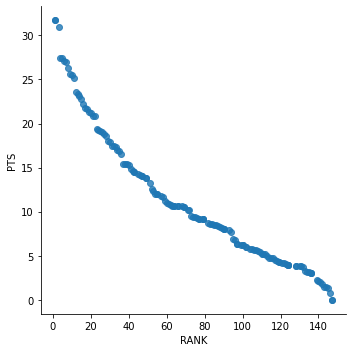

In [ ]:
sns.lmplot(nbaDf.columns[2], nbaDf.columns[23], data = nbaDf, fit_reg=False)

##Summary Statistics

In [ ]:
print (('Mean:%f'% np.mean(points)))
print (('Median:%f'% np.median(points)))
print (('Variance:%f'% np.var(points)))


Mean:11.250676
Median:9.400000
Variance:55.828040
